In [ ]:
import pandas as pd
import os

In [ ]:
#merging all 12 datasets to one

files =[file for file in os.listdir('./Sales_Data')]

In [ ]:
all_months_data=pd.DataFrame()
for file in files:
    df=pd.read_csv("./Sales_Data/"+file)
    print(file)
    all_months_data=pd.concat([all_months_data,df])
all_months_data

In [ ]:
#making one csv for all

all_months_data.to_csv("all_data.csv",index=False)

In [ ]:
pd.read_csv("all_data.csv")

#### Q1: what was best month for sales and money earned that month?

In [ ]:
#drop all the rows with NAN values

all_months_data.dropna(how="all",inplace=True)

In [ ]:
#find "or" and delete it

all_months_data=all_months_data[all_months_data["Order Date"].str[0:2]!="Or"]

In [ ]:
#addidng a column called month and converting it to int

all_months_data["month"]=all_months_data["Order Date"].str[0:2]
all_months_data["month"]=all_months_data["month"].astype("int")
all_months_data.head()

In [ ]:
#converting other columns to correct types

all_months_data["Price Each"]=all_months_data["Price Each"].astype('float')
all_months_data["Quantity Ordered"]=all_months_data["Quantity Ordered"].astype('int')

In [ ]:
#creating a new column for sales

all_months_data["sales"]=all_months_data["Price Each"]*all_months_data["Quantity Ordered"]

In [ ]:
#grouping by months and taking sum of sales

results=all_months_data.groupby('month').sum()["sales"].round(5)
results

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#plot for monthly sales

months=range(1,13)
plt.bar(months,results)
plt.xticks(months)
plt.title("Monthly Sales")
plt.xlabel("month number")
plt.ylabel("Sales in USD")

### Q2: Which city made highest sales?

In [ ]:
# adding a city column

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split()[0]
    
all_months_data["City"]=all_months_data["Purchase Address"].apply(lambda x : get_city(x) + ' ' + get_state(x))

In [ ]:
all_months_data.head()

In [ ]:
#grouping by cities and taking sum of sales

city_wise_results=all_months_data.groupby("City").sum()['sales'].round(5)
city_wise_results

In [ ]:
#plot sales for each city

Cities=list(city_wise_results.index)

plt.bar(Cities,city_wise_results,width=0.8)

plt.xticks(Cities,rotation='vertical',size=10)
plt.title("Sales")
plt.xlabel("Cities")
plt.ylabel("Sales in USD")

### Q3: What time should we display advertisements to maximize likelihood of customers buying product 

In [ ]:
#converting order date to datetime object

all_months_data['Order Date']=pd.to_datetime(all_months_data['Order Date'])

In [ ]:
#adding a columns for hour and minute

all_months_data['Hour']=all_months_data["Order Date"].dt.hour
all_months_data['Minute']=all_months_data["Order Date"].dt.minute

In [ ]:
all_months_data.head()

In [ ]:
#creating list of hours

Hours=[hour for hour, df in all_months_data.groupby('Hour')]

In [ ]:
#grouping by hour and taking sum of sales

hourly_results=all_months_data.groupby('Hour').count()

In [ ]:
plt.plot(Hours,hourly_results)
plt.xticks(Hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('No. of orders')
plt.show

In [ ]:
#would recommend before 11 am or before 7 pm

### Q4: What products are most often sold together?

In [ ]:
#making a new df of only dplicated items

df=all_months_data[all_months_data['Order ID'].duplicated(keep=False)]

In [ ]:
#joined 2 products to be displayed in 1 column

df["Grouped"]=df.groupby('Order ID')["Product"].transform(lambda x: ','.join(x))

In [ ]:
#took only required columns and dropped duplicates

df=df[["Order ID","Grouped"]].drop_duplicates()
df

In [ ]:
from itertools import combinations
from collections import Counter

In [ ]:
#used counter to count maximun occurences of pairs

count=Counter()

for items in df['Grouped']:
    lst=items.split(',')
    count.update(Counter(combinations(lst,2)))

In [ ]:
count.most_common()

In [ ]:
# ('iPhone', 'Lightning Charging Cable'): 1005

### Q4: Which product is sold the most and why ?

In [34]:
# grouping by products to get quantity of each one
quantity_ordered=all_months_data.groupby('Product').sum()['Quantity Ordered']

In [37]:
# types of products

products=[product for product,df in all_months_data.groupby('Product')]

['20in Monitor',
 '27in 4K Gaming Monitor',
 '27in FHD Monitor',
 '34in Ultrawide Monitor',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 'Flatscreen TV',
 'Google Phone',
 'LG Dryer',
 'LG Washing Machine',
 'Lightning Charging Cable',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 'USB-C Charging Cable',
 'Vareebadd Phone',
 'Wired Headphones',
 'iPhone']

<function matplotlib.pyplot.show(close=None, block=None)>

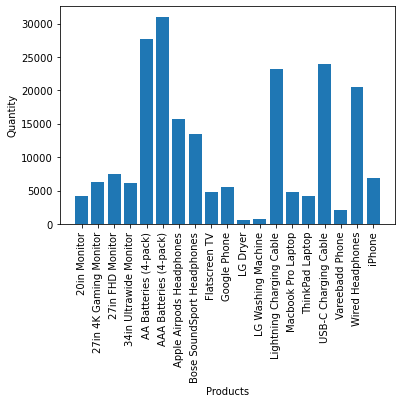

In [41]:
#pltting quantity ordered of each products

plt.bar(products,quantity_ordered)
plt.xticks(rotation='vertical')
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.show

In [42]:
# AAA Batteries (4-pack)

In [43]:
# finding correlation between quantity sold and prices

In [49]:
prices=all_months_data.groupby('Product').mean()['Price Each']

<ipython-input-68-a6fa47869568>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical')


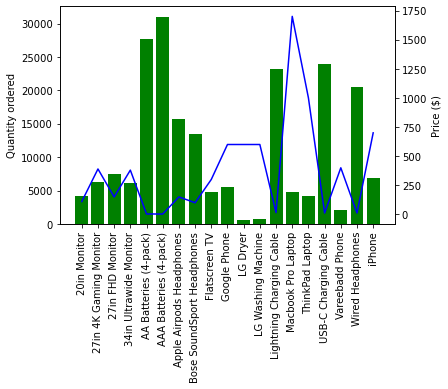

In [68]:
fig, ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity_ordered,color='g')
ax2.plot(products,prices,color='b')
ax1.set_xticklabels(products,rotation='vertical')
ax2.set_ylabel("Price ($)")
ax1.set_ylabel("Quantity ordered")
plt.show()

In [ ]:
#this shows that quantiy ordered and prices are correlated , products with lower prices are bought more